In [40]:
import numpy as py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df = pd.read_csv('seer_modified_df.csv')

In [42]:
## 2. prepare data for modeling: changing the column names
df = df.rename(columns = {
    "Age with single ages and 100+": 'Age',
    "Year of diagnosis": 'Year'
})

In [43]:
## 3. drop the following columns ( SEER_State )
## completed in the last assignment.

##4. Create a new dataframe.

df.to_csv('seer_crc_modified_df.csv', index=False)
seer_crc_modified_df = pd.read_csv('seer_crc_modified_df.csv')
seer_crc_modified_df


,Age,Sex,Year,Race,Ethnicity,Marital_Status,Primary Site,Grade,Summary Stage (2004+),Primary_Site,COD recode,Survival_Recode,Appalachia
0,66,0,2013,1,0,1,18.0,2,1,1,2,1,0
1,70,0,2010,0,0,1,18.7,2,1,0,0,0,0
2,48,0,2001,0,0,1,18.7,2,99,1,2,1,0
3,54,0,2006,1,0,1,18.2,3,3,1,1,0,0
4,88,1,2009,0,0,0,18.0,2,3,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149237,39,1,2010,0,0,0,18.6,2,2,1,2,1,1
149238,69,1,2017,0,0,99,18.4,2,1,1,2,0,1
149239,52,1,2007,1,0,0,18.5,2,3,0,0,0,1
149240,72,1,2003,0,0,0,18.5,3,99,1,0,1,1


Survival_Recode          1.000000
Primary_Site             0.760706
Summary Stage (2004+)    0.195676
Primary Site             0.085217
Age                      0.081915
Marital_Status           0.013710
Appalachia               0.005305
Sex                      0.002621
Ethnicity               -0.000334
Race                    -0.000528
Year                    -0.010666
COD recode              -0.010837
Name: Survival_Recode, dtype: float64

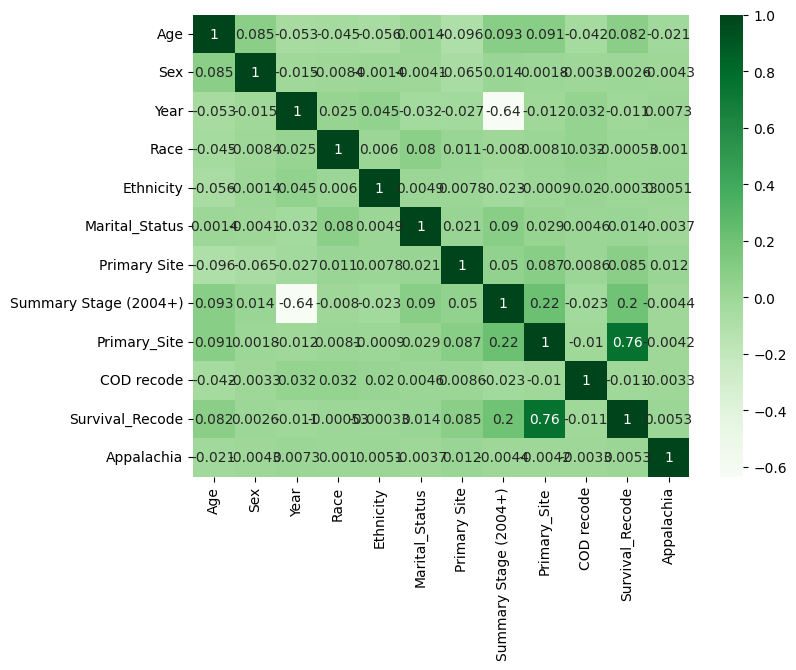

In [44]:
## 4. Heatmap analysis. 
heatmapdf = df.select_dtypes(include=['number'])
correlation = heatmapdf.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='Greens')
#list the features (columns) in decreasing order of survival recode
correlation_impact_survival = correlation['Survival_Recode'].sort_values(ascending=False)
correlation_impact_survival


In [60]:
## 5. Features and Target vectors
from sklearn.preprocessing import LabelEncoder
y = seer_crc_modified_df['Survival_Recode'] 
X = seer_crc_modified_df.drop(columns=['Survival_Recode'])

find_non_numeric = X.select_dtypes(include=['object']).columns

print(find_non_numeric)
for col in find_non_numeric:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))
print(X['Grade '])
df.isnull().sum()

Index(['Grade '], dtype='object')
0         2
1         2
2         2
3         3
4         2
         ..
149237    2
149238    2
149239    2
149240    3
149241    2
Name: Grade , Length: 149242, dtype: int64


Age                      0
Sex                      0
Year                     0
Race                     0
Ethnicity                0
Marital_Status           0
Primary Site             0
Grade                    0
Summary Stage (2004+)    0
Primary_Site             0
COD recode               0
Survival_Recode          0
Appalachia               0
dtype: int64

In [61]:
##Split data
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=1, include_bias=False)
poly_features = poly.fit_transform(X)
## 80% training and 20%test
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=42)

In [63]:
X_test.shape

(29849, 12)

In [64]:
##create 2nd order polyreg
poly_reg = LinearRegression()

#fit 
poly_reg.fit(X_train, y_train)

#prediction
y_test_pred = poly_reg.predict(X_test)
#last step not required
y_train_pred = poly_reg.predict(X_train)

In [65]:
##finding the abs and MSE

from sklearn import metrics
from sklearn.metrics import mean_squared_error
import math

metrics.mean_absolute_error(y_test, y_test_pred)
rmse = py.sqrt(mean_squared_error(y_test, y_test_pred))
##from video and polyfit equation 
def y_generator(x):
    y_val = 0.1*math.sin(x)-0.24*math.cos(x)
    return y_val
y=y_generator(30)
print(y)

np.float64(48.1800771509562)